#Business Context


Vehicle breakdowns and engine failures lead to significant financial losses for both individual owners and fleet operators. Unexpected engine failures can cause expensive repairs, operational downtime, and safety risks. Predictive maintenance in the automotive industry can help minimize these issues by leveraging sensor data to forecast potential failures before they occur.

Automobile manufacturers, fleet managers, and service providers aim to develop data-driven solutions to improve engine reliability and optimize maintenance schedules. By analyzing engine health parameters such as RPM, temperature, pressure, and other sensor readings, machine learning models can be trained to predict when an engine requires maintenance, allowing proactive intervention before a failure occurs.

The sensor values in the dataset are consistent with the operating parameters of larger and small engines commonly found in equipment like Vechiles, lawnmowers, portable generators, and compact machinery. Some engines operate at lower RPMs, pressures, and temperatures compared to larger automotive engines and vice versa. Therefore, the data is appropriate for developing predictive maintenance models tailored to large and small engine applications.


**Objective:**
As a Data Scientist, your goal is to build a predictive maintenance model that can analyze historical and real-time engine sensor data to identify potential failures. The model should accurately classify whether an engine requires maintenance or is operating normally.

This solution will help:

Reduce unplanned breakdowns and costly repairs.
Improve vehicle performance and engine lifespan.
Optimize maintenance schedules to minimize downtime
Provide data-driven insights to manufacturers and fleet operators for better decision-making.

**Approach:**
To achieve this objective, you will:

Explore and preprocess the dataset, handling missing values, outliers, and sensor anomalies.
Perform exploratory data analysis (EDA) to identify patterns in engine health parameters.
Develop machine learning models (e.g., Decision Trees, Random Forest, XGBoost, or Deep Learning models) to predict engine failures.
Evaluate model performance using appropriate classification metrics such as accuracy, precision, recall, and F1-score.
Deploy the model in a real-time monitoring system to alert users about potential failures.
By implementing a robust predictive maintenance system, this solution can lead to significant cost savings and improved efficiency in the automotive sector.

**Data Description**:

Engine_RPM: The number of revolutions per minute (RPM) of the engine, indicating engine speed. It is defined in Revolutions per Minute (RPM).

Lub_Oil_Pressure: The pressure of the lubricating oil in the engine, essential for reducing friction and wear. It is defined in bar or kilopascals (kPa)

Fuel_Pressure: The pressure at which fuel is supplied to the engine, critical for proper combustion. It is defined in bar or kilopascals (kPa)

Coolant_Pressure: The pressure of the engine coolant, affecting engine temperature regulation. It is defined in bar or kilopascals (kPa)

Lub_Oil_Temperature: The temperature of the lubricating oil, which impacts viscosity and engine performance. It is defined in degrees Celsius (°C)

Coolant_Temperature: The temperature of the engine coolant, crucial for preventing overheating. It is defined in degrees Celsius (°C)

Engine_Condition: A categorical or numerical label representing the health of the engine, potentially indicating normal operation or various levels of wear and failure risks. It is defined as a categorical variable (0/1) representing a state such as "0 = Off/False/Active" and "1 = On/True/Faulty"

# Importing necessary libraries and data

In [1]:
!pip install xgboost
!pip install huggingface_hub

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

from xgboost import XGBClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler,OneHotEncoder
# To create the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import SimpleImputer

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

#Loading the DataSet

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CapStone_PredictiveMaintenance/

/content/drive/MyDrive/CapStone_PredictiveMaintenance


In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/CapStone_PredictiveMaintenance/engine_data.csv")

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/engine_data.csv") ## Complete the code to read the dataset
data =df

In [5]:

df_copy = df.copy()

#Data Overview

In [ ]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [ ]:
df.shape

(19535, 7)

In [ ]:
df.tail()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1
19534,504,3.775246,3.962480,2.038647,75.564313,80.421421,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


**Observations:**
Engine rpm,	Engine Condition are numeric type and Lub oil pressure,	Fuel pressure,	Coolant pressure,	lub oil temp, and	Coolant temp are float type

There are no null values in the dataset.

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the data.

**Observations**:No missing values or duplicates in the dataset.

Data types are consistent and numeric for all sensor readings, binary for Engine Condition.

Dataset size: 19,535 rows × 7 columns

#Exploratory Data Analysis

## Univariant Analysis

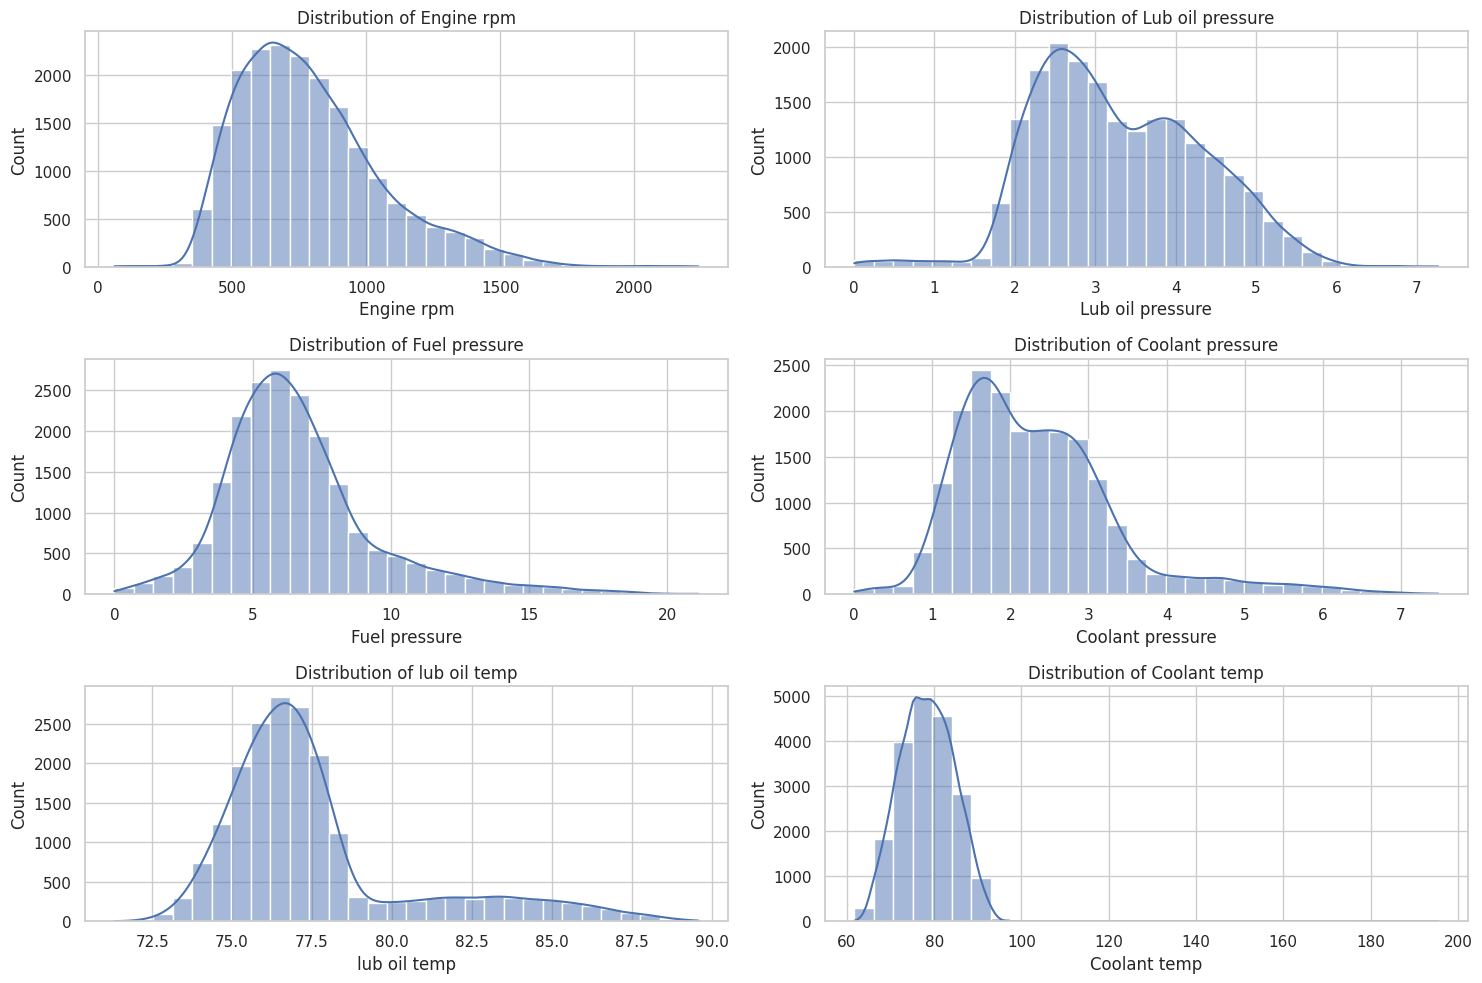

In [ ]:
numeric_cols = df.drop(columns=["Engine Condition"]).columns

# Distribution plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


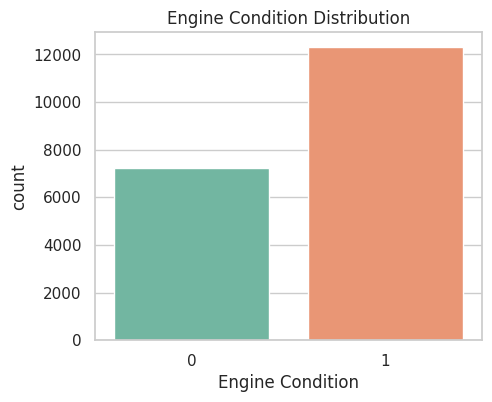

In [ ]:

# Countplot for Engine Condition
plt.figure(figsize=(5, 4))
sns.countplot(x="Engine Condition", data=df, palette="Set2")
plt.title("Engine Condition Distribution")
plt.show()

## Bivariant Analysis

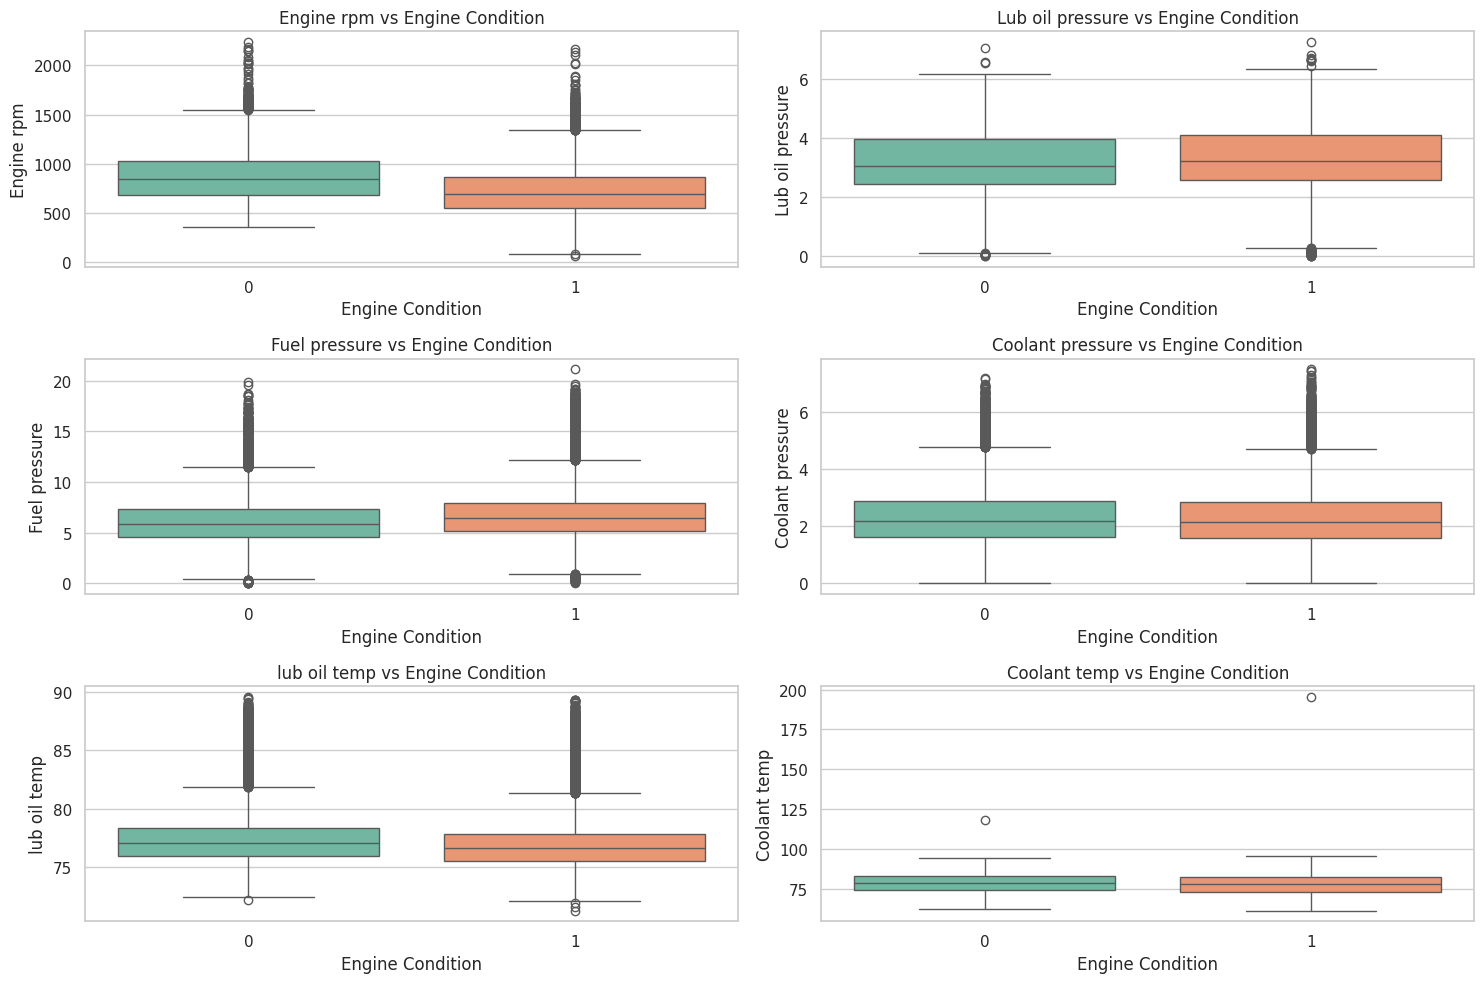

In [ ]:
# Boxplots: Features vs Engine Condition
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x="Engine Condition", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Engine Condition")
plt.tight_layout()
plt.show()

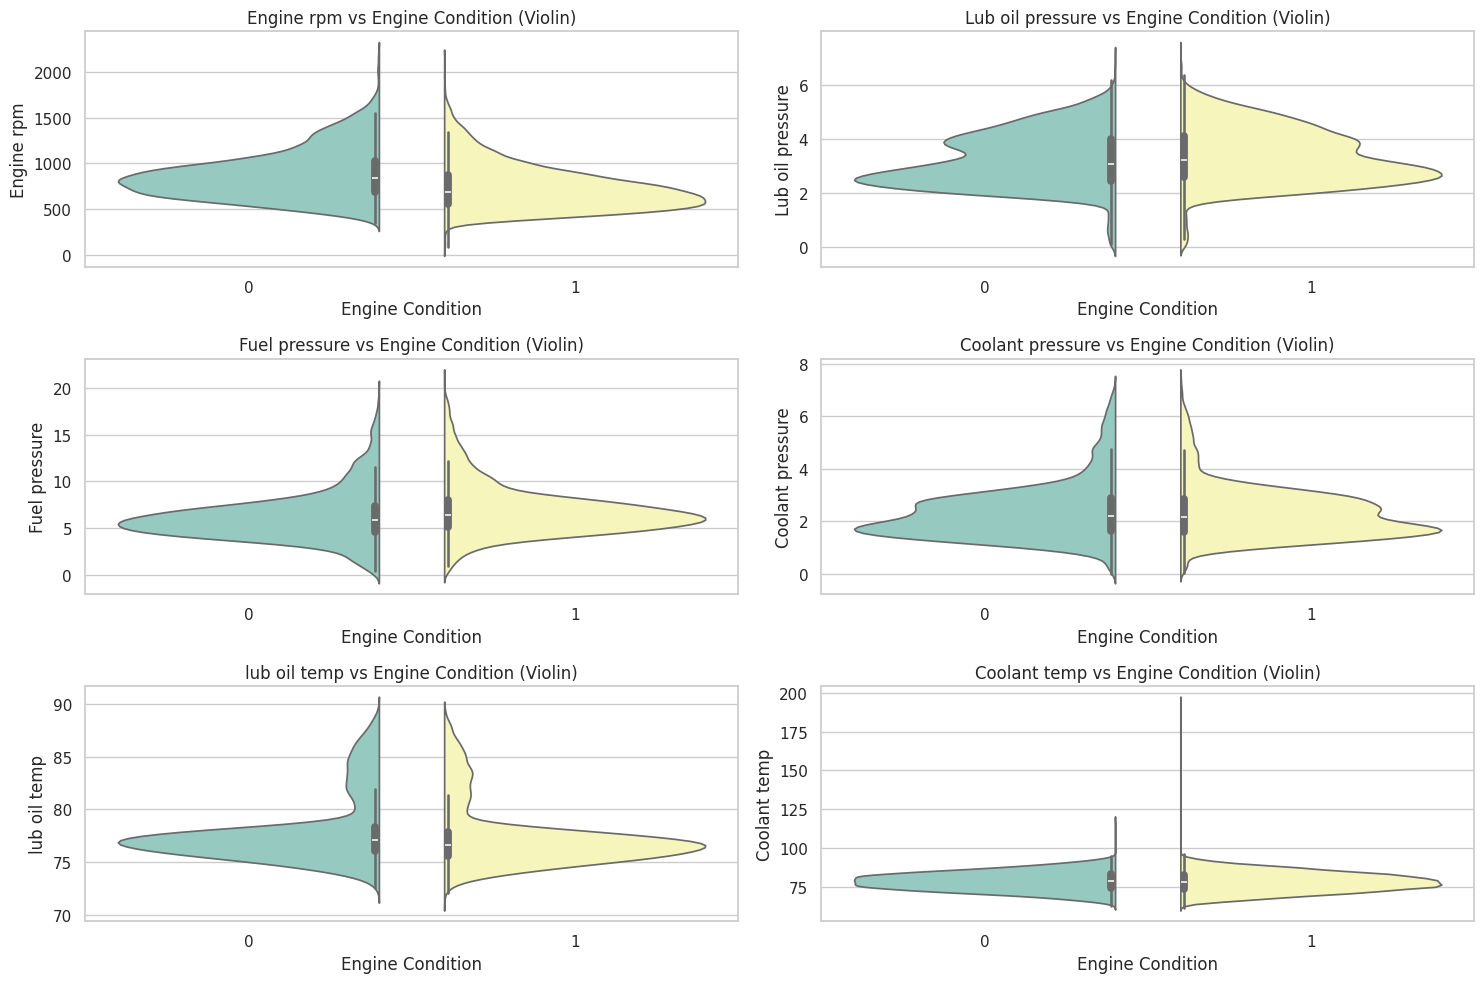

In [ ]:

# Violin plots: Features vs Engine Condition
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(x="Engine Condition", y=col, data=df, palette="Set3", split=True)
    plt.title(f"{col} vs Engine Condition (Violin)")
plt.tight_layout()
plt.show()

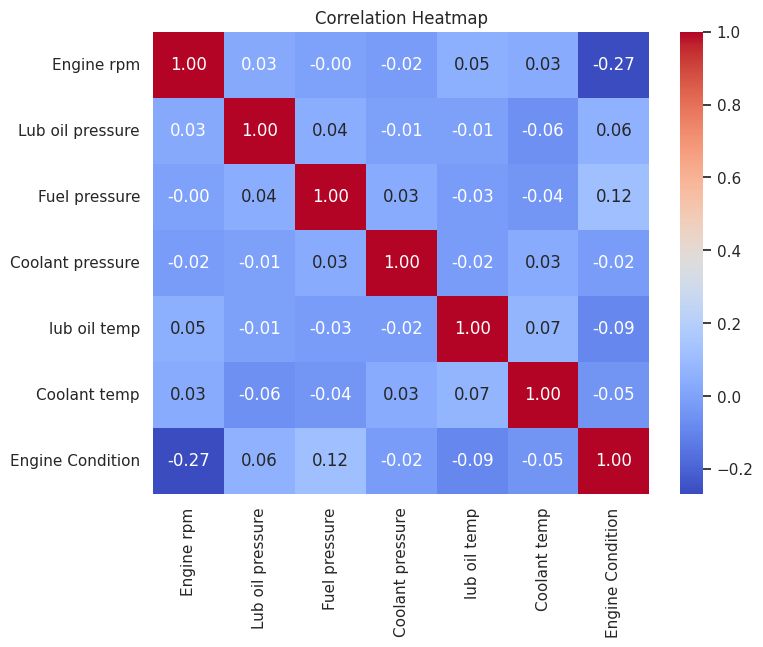

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Correlation Heatmap:**

Most features have weak correlations with each other and with engine condition.

The most notable is Engine rpm, which has a small but clear negative correlation with engine condition.

Fuel pressure shows the highest positive correlation with engine condition, but still weak.

## Outlier & Trend Analysis


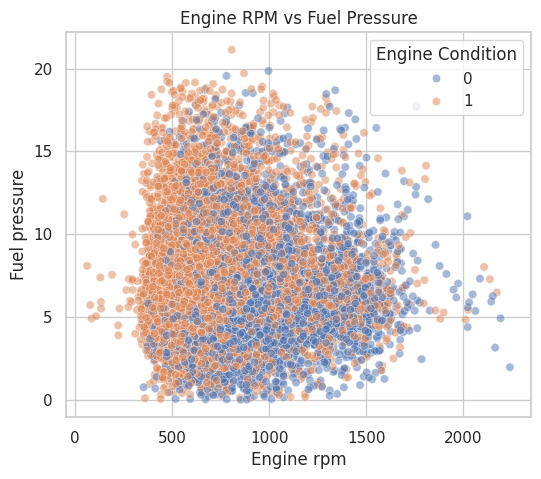

In [ ]:
# Scatterplots (example: RPM vs Fuel Pressure)
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Engine rpm", y="Fuel pressure", hue="Engine Condition", data=df, alpha=0.5)
plt.title("Engine RPM vs Fuel Pressure")
plt.show()

**Observations** :
Engine RPM: Centered around ~750, with a wide range (61–2239). Some very high values look unusual.

Lub Oil Pressure: Mostly between 2–5, normal distribution.

Fuel Pressure: Avg ~6.6, but a long right tail with spikes up to 21. Clear outliers present.

Coolant Pressure: Avg ~2.3, generally well-distributed, with some higher outliers.

Lub Oil Temp: Avg ~77°C, most values within 71–89°C. Appears stable.

Coolant Temp: Avg ~78°C, but some extreme outliers up to 195°C (likely faulty readings).

Engine Condition: Slight imbalance: ~63% faulty (1), ~37% healthy (0).

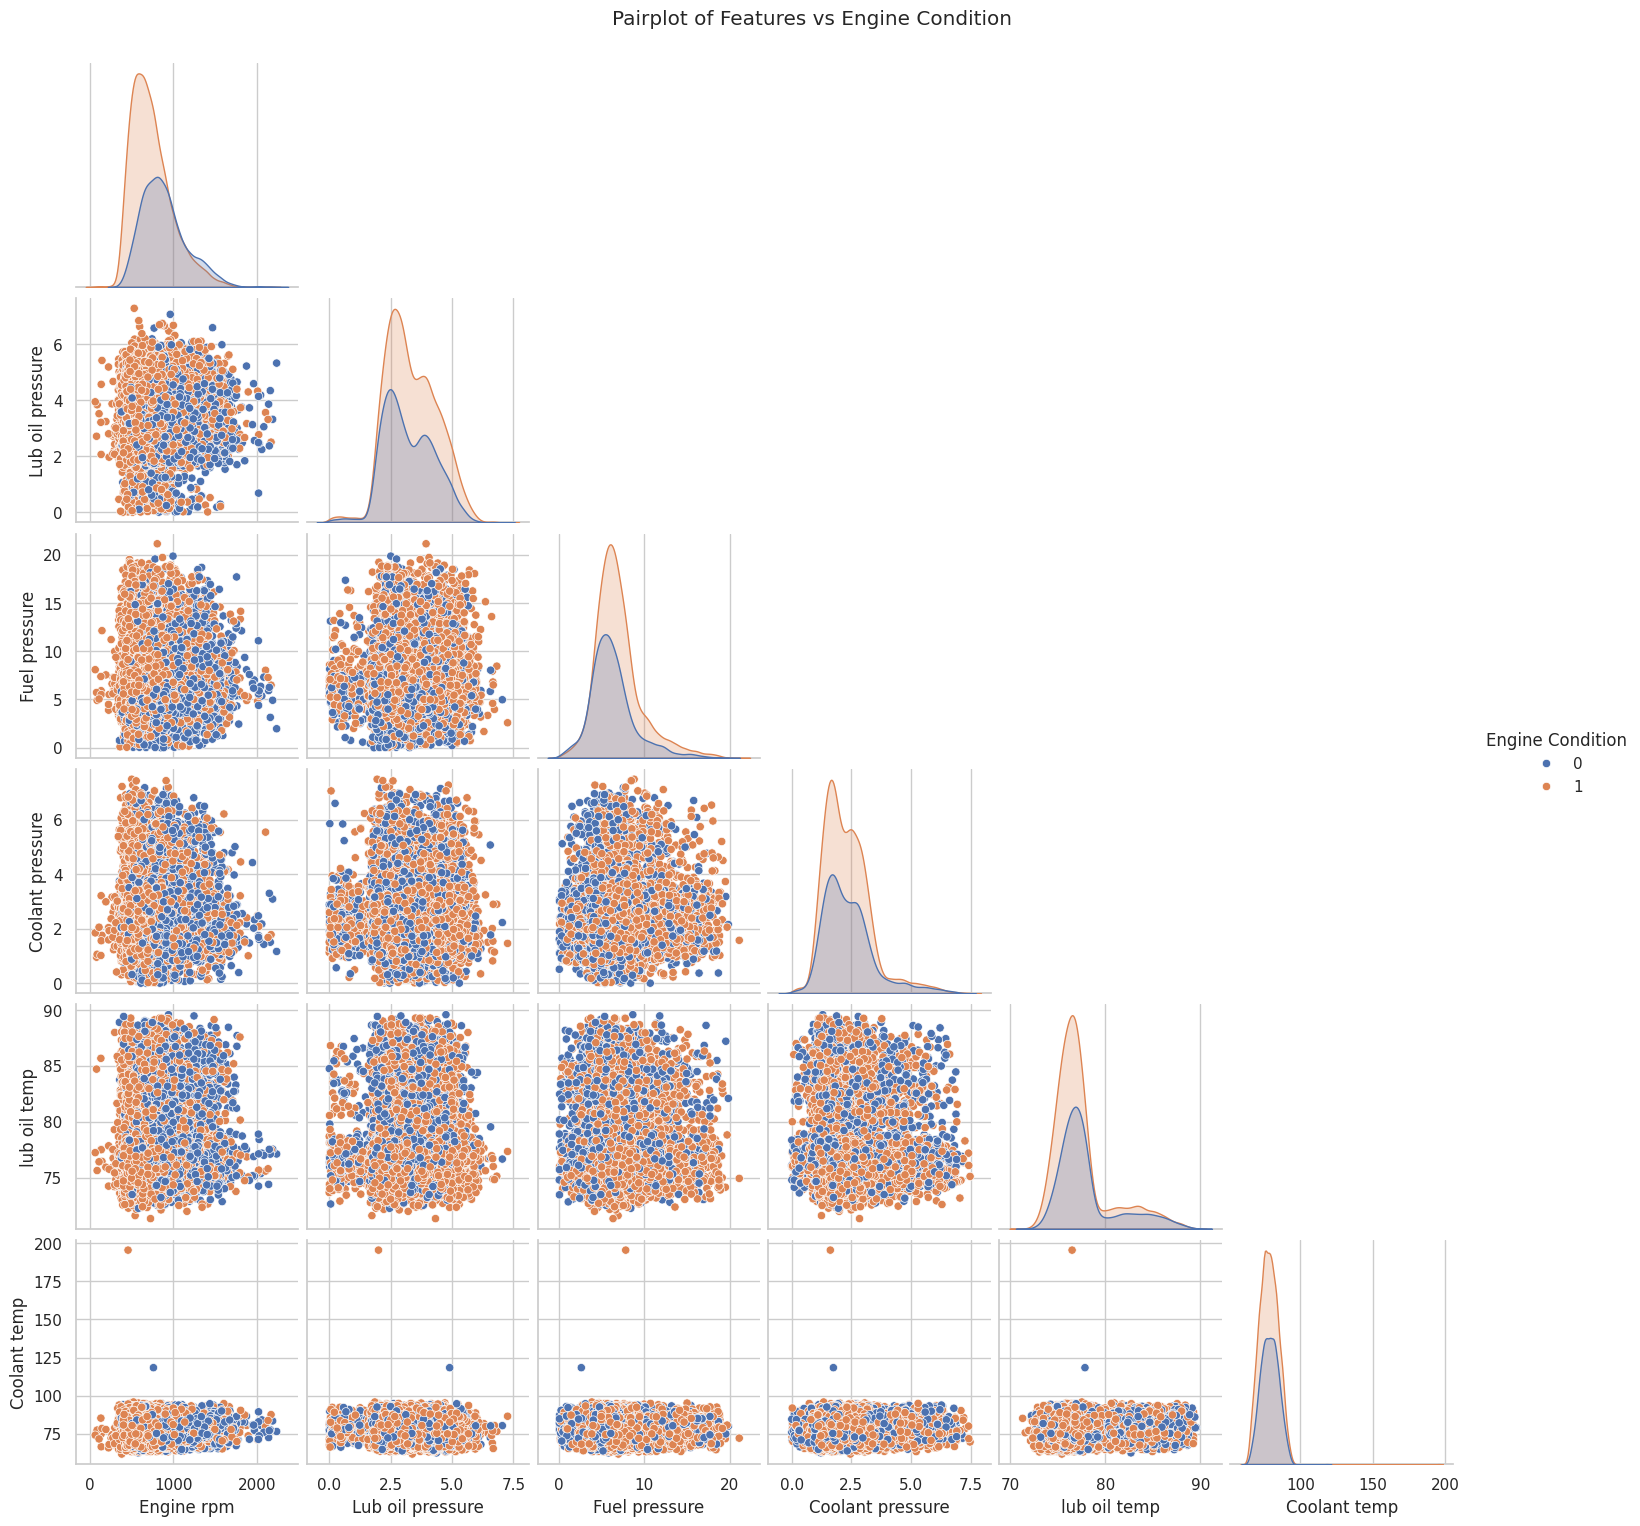

In [ ]:
# Pairplot to see trends & outliers
sns.pairplot(df, hue="Engine Condition", diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Features vs Engine Condition", y=1.02)
plt.show()


## Observations

**Key Observations:**
Class imbalance (63% faulty vs 37% healthy) needs handling during ML modeling.

Fuel Pressure & Coolant Temp are strong indicators of faults due to their outliers.

RPM extremes (very low or very high) often align with faulty conditions.

Multivariate patterns matter more than single-variable thresholds.

#Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the engine will fail (1) but in reality, it won't (0).
2. Model predicts that the engine won't fail (0) but in reality, it will (1).

### Which case is more important?
* Both the cases are important as:

* False positives can lead to unnecessary maintenance, wasting resources and increasing downtime.


* False negatives can lead to unexpected engine failures, causing costly repairs and potential safety risks.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

In [ ]:
# Create a master folder to keep all files created when executing the below code cells
import os
os.makedirs("predective_maintainance_project", exist_ok=True)

folder created successfully

In [9]:
# Create a folder for storing the model building files
os.makedirs("predective_maintainance_project/model_building", exist_ok=True)

## Data Registration

In [6]:
os.makedirs("predective_maintainance_project/data", exist_ok=True)

data and model building folder created successfully

In [10]:
%%writefile predective_maintainance_project/model_building/data_register.py
from huggingface_hub.utils import RepositoryNotFoundError, HfHubHTTPError
from huggingface_hub import HfApi, create_repo
import os


repo_id = "sasipriyank/predectivemlops"
repo_type = "dataset"

# Initialize API client
api = HfApi(token=os.getenv("HF_TOKEN"))

# Step 1: Check if the space exists
try:
    api.repo_info(repo_id=repo_id, repo_type=repo_type)
    print(f"Space '{repo_id}' already exists. Using it.")
except RepositoryNotFoundError:
    print(f"Space '{repo_id}' not found. Creating new space...")
    create_repo(repo_id=repo_id, repo_type=repo_type, private=False)
    print(f"Space '{repo_id}' created.")

api.upload_folder(
    folder_path="predective_maintainance_project/data",
    repo_id=repo_id,
    repo_type=repo_type,
)

Writing predective_maintainance_project/model_building/data_register.py


Once the **data** folder created after executing the above cell, please upload the **engine_data.csv** in to the folder

## Data Preparation

In [11]:
# -------------------- SETUP --------------------
import os
from huggingface_hub import login, HfApi
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import userdata
import fsspec

#  Store your token in an environment variable
os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")

#  Authenticate with Hugging Face
login(token=os.getenv("HF_TOKEN"))

#  Optional: verify the login
api = HfApi()
user_info = api.whoami()
print(f"Logged in as: {user_info['name']}")

# -------------------- LOAD DATA --------------------
DATASET_PATH = "hf://datasets/sasipriyank/predectivemlops/engine_data.csv"

#  Load from Hugging Face hub using fsspec
try:
    with fsspec.open(DATASET_PATH, mode='r', token=os.getenv("HF_TOKEN")) as f:
        engine_dataset = pd.read_csv(f)
    print("Dataset loaded successfully.")
    print(engine_dataset.head())
except FileNotFoundError:
    print(f"Error: Dataset not found at {DATASET_PATH}. Please ensure the file exists in your Hugging Face dataset repository.")
except Exception as e:
    print(f"An error occurred: {e}")

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Logged in as: sasipriyank
Dataset loaded successfully.
  Engine rpm Lub oil pressure Fuel pressure Coolant pressure lub oil temp  \
0        700      2.493591821   11.79092738      3.178980794  84.14416293   
1        876      2.941605932   16.19386556      2.464503704  77.64093415   
2        520      2.961745579   6.553146911      1.064346764  77.75226574   
3        473      3.707834743   19.51017166      3.727455362  74.12990715   
4        619      5.672918584   15.73887141      2.052251454  78.39698883   

  Coolant temp Engine Condition  
0   81.6321865                1  
1   82.4457245                0  
2  79.64577667                1  
3  71.77462869                1  
4  87.00022538                0  


In [12]:
%%writefile predective_maintainance_project/model_building/prep.py
# for data manipulation
import pandas as pd
import sklearn
# for creating a folder
import os
# for data preprocessing and pipeline creation
from sklearn.model_selection import train_test_split
# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# Handle Hugging Face token from Colab or environment
try:
    from google.colab import userdata
    HF_TOKEN = userdata.get('HF_TOKEN')
    print(" Loaded HF token from Colab userdata")
except ModuleNotFoundError:
    HF_TOKEN = os.getenv("HF_TOKEN")
    if HF_TOKEN:
        print(" Loaded HF token from environment variable")
    else:
        print(" No HF token found — please set HF_TOKEN as an environment variable.")


api = HfApi(token=HF_TOKEN)
DATASET_PATH = "hf://datasets/sasipriyank/predectivemlops/engine_data.csv" # Corrected dataset path
engine_dataset = pd.read_csv(DATASET_PATH) # Updated variable name
print("Dataset loaded successfully.")
# Define the target variable for the classification task
target = 'Engine Condition'

# List of numerical features in the dataset
numeric_features = [
    'Lub oil pressure',               # Lub oil pressure
    'Fuel pressure',           # Fuel pressure
    'Coolant pressure', # Coolant Pressure
    'lub oil temp',    # Lub oil temp
    'Coolant temp',    # coolant Temp.
    'Engine rpm'    # Engine Rpm
 ]

# Define predictor matrix (X) using selected numeric and categorical features
X = engine_dataset[numeric_features] # Updated variable name

# Define target variable
y = engine_dataset[target] # Updated variable name


# Split dataset into train and test
# Split the dataset into training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,              # Predictors (X) and target variable (y)
    test_size=0.2,     # 20% of the data is reserved for testing
    random_state=42    # Ensures reproducibility by setting a fixed random seed
)

Xtrain.to_csv("Xtrain.csv",index=False)
Xtest.to_csv("Xtest.csv",index=False)
ytrain.to_csv("ytrain.csv",index=False)
ytest.to_csv("ytest.csv",index=False)


files = ["Xtrain.csv","Xtest.csv","ytrain.csv","ytest.csv"]

for file_path in files:
    api.upload_file(
        path_or_fileobj=file_path,
        path_in_repo=file_path.split("/")[-1],  # just the filename
        repo_id="sasipriyank/predectivemlops",
        repo_type="dataset",
    )

Writing predective_maintainance_project/model_building/prep.py


## Model Training and Registration with Experimentation Tracking

### Experimentation and Tracking (Development Environment)

In [13]:
!pip install mlflow==3.0.1 pyngrok==7.2.12 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.0 MB/s eta 0:00:00


In [14]:
!kill $(pgrep ngrok)
!mlflow ui --port 5000 &   # restart fresh if needed


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]
[2025-10-12 10:24:06 +0000] [1176] [INFO] Starting gunicorn 23.0.0
[2025-10-12 10:24:06 +0000] [1176] [INFO] Listening at: http://127.0.0.1:5000 (1176)
[2025-10-12 10:24:06 +0000] [1176] [INFO] Using worker: sync
[2025-10-12 10:24:06 +0000] [1177] [INFO] Booting worker with pid: 1177
[2025-10-12 10:24:06 +0000] [1178] [INFO] Booting worker with pid: 1178
[2025-10-12 10:24:06 +0000] [1179] [INFO] Booting worker with pid: 1179
[2025-10-12 10:24:06 +0000] [1180] [INFO] Booting worker with pid: 1180
[2025-10-12 10:28:03 +0000] [1176] [INFO] Handling signal: int
[2025-10-12 10:28:03 +0000] [1177] [INFO] Worker exiting (pid: 1177)
[2025-10-12 10:28:03 +0000] [1179] [INFO] Worker exiting (pid: 1179)
[2025-10-12 10:28:03 +0000] [1178] [INFO] Worker exiting (pid: 1178)
[2025-10-12 10:28:03 +0000] [1180] [INFO] Worker exiting (pid: 1180)
[2025-10-12 10:28:04 +0000] [1176] [INFO] Shutting down: Master


To get the ngrok authorization token, please go to this [link](https://dashboard.ngrok.com/authtokens), generate a new token, copy it, and paste it in the designated code line below.

In [15]:
!kill $(pgrep ngrok)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [16]:
!ps -ef | grep ngrok


root        3540     220  0 10:33 ?        00:00:00 /bin/bash -c ps -ef | grep ngrok
root        3542    3540  0 10:33 ?        00:00:00 grep ngrok


In [17]:
from pyngrok import ngrok
import subprocess
import mlflow
import os

# Set your auth token here (replace with your actual token)
ngrok.set_auth_token("31GbMsnCqYin3xh97YteWy6usbK_ZVhmq9C6V3zW2u9yiLXa")

# Kill any running ngrok processes to avoid the free tier limitation
# This is a workaround for the free tier's single session limit
try:
    ngrok.kill()
    print("Killed any running ngrok processes.")
except Exception as e:
    print(f"No ngrok processes running or failed to kill: {e}")


# Start MLflow UI on port 5000
process = subprocess.Popen(["mlflow", "ui", "--port", "5000"])

# Create public tunnel
public_url = ngrok.connect(5000).public_url
print("MLflow UI is available at:", public_url)

Killed any running ngrok processes.
MLflow UI is available at: https://a5031d20b9a9.ngrok-free.app


In [18]:
# Set the tracking URL for MLflow
mlflow.set_tracking_uri(public_url)

# Set the name for the experiment
mlflow.set_experiment("predectivemlops")

2025/10/12 10:34:09 INFO mlflow.tracking.fluent: Experiment with name 'predectivemlops' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/432486015413729094', creation_time=1760265249917, experiment_id='432486015413729094', last_update_time=1760265249917, lifecycle_stage='active', name='predectivemlops', tags={}>

Experiment and Tracking in Development Environment

In [19]:
# Data manipulation
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Model training, tuning, evaluation
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Model serialization and system
import joblib
import os

# Hugging Face API
from huggingface_hub import HfApi, create_repo
from huggingface_hub.utils import RepositoryNotFoundError

# MLflow
import mlflow

# ------------------------------
# Load HF token
try:
    from google.colab import userdata
    HF_TOKEN = userdata.get('HF_TOKEN')
except ModuleNotFoundError:
    HF_TOKEN = os.getenv("HF_TOKEN")

api = HfApi(token=HF_TOKEN)

# MLflow setup
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("predectivemlops")

# Dataset paths
Xtrain_path = "hf://datasets/sasipriyank/predectivemlops/Xtrain.csv"
Xtest_path  = "hf://datasets/sasipriyank/predectivemlops/Xtest.csv"
ytrain_path = "hf://datasets/sasipriyank/predectivemlops/ytrain.csv"
ytest_path  = "hf://datasets/sasipriyank/predectivemlops/ytest.csv"

# ------------------------------
# Load CSV with header and safe conversion
Xtrain = pd.read_csv(Xtrain_path, header=0)
Xtest  = pd.read_csv(Xtest_path, header=0)
ytrain = pd.read_csv(ytrain_path, header=0).iloc[:,0]
ytest  = pd.read_csv(ytest_path, header=0).iloc[:,0]

numeric_features = [
    'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
    'lub oil temp', 'Coolant temp', 'Engine rpm'
]

# Convert numeric columns safely
for col in numeric_features:
    Xtrain[col] = pd.to_numeric(Xtrain[col], errors='coerce')
    Xtest[col]  = pd.to_numeric(Xtest[col], errors='coerce')

# Drop rows with NaN (if conversion fails)
Xtrain.dropna(inplace=True)
Xtest.dropna(inplace=True)
ytrain = ytrain[Xtrain.index].astype(int)
ytest  = ytest[Xtest.index].astype(int)

print(" Data loaded and converted successfully")

# ------------------------------
# Handle class imbalance
class_weight = ytrain.value_counts()[0] / ytrain.value_counts()[1]

# Preprocessing
preprocessor = make_column_transformer((StandardScaler(), numeric_features))

# XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=class_weight, random_state=42)

# Hyperparameter grid
param_grid = {
    'xgbclassifier__n_estimators': [50, 75, 100],
    'xgbclassifier__max_depth': [2, 3, 4],
    'xgbclassifier__colsample_bytree': [0.4, 0.5],
    'xgbclassifier__colsample_bylevel': [0.4, 0.5],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
    'xgbclassifier__reg_lambda': [0.4, 0.5]
}

# Pipeline
model_pipeline = make_pipeline(preprocessor, xgb_model)

# ------------------------------
# Train & log with MLflow
with mlflow.start_run():
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(Xtrain, ytrain)

    best_model = grid_search.best_estimator_

    classification_threshold = 0.45

    # Predictions
    y_pred_train_proba = best_model.predict_proba(Xtrain)[:,1]
    y_pred_train = (y_pred_train_proba >= classification_threshold).astype(int)
    y_pred_test_proba = best_model.predict_proba(Xtest)[:,1]
    y_pred_test = (y_pred_test_proba >= classification_threshold).astype(int)

    # Reports
    train_report = classification_report(ytrain, y_pred_train, output_dict=True)
    test_report  = classification_report(ytest, y_pred_test, output_dict=True)

    # Log metrics
    mlflow.log_metrics({
        "train_accuracy": train_report['accuracy'],
        "train_precision": train_report['1']['precision'],
        "train_recall": train_report['1']['recall'],
        "train_f1-score": train_report['1']['f1-score'],
        "test_accuracy": test_report['accuracy'],
        "test_precision": test_report['1']['precision'],
        "test_recall": test_report['1']['recall'],
        "test_f1-score": test_report['1']['f1-score']
    })

    # Save locally
    model_path = "best_predective_model.joblib"
    joblib.dump(best_model, model_path)
    mlflow.log_artifact(model_path, artifact_path="model")
    print(f" Model saved at {model_path}")

# ------------------------------
# Upload to Hugging Face
repo_id = "sasipriyank/predectivemodel"
repo_type = "model"
try:
    api.repo_info(repo_id=repo_id, repo_type=repo_type)
    print(f"Space '{repo_id}' already exists.")
except RepositoryNotFoundError:
    create_repo(repo_id=repo_id, repo_type=repo_type, private=False)
    print(f"Space '{repo_id}' created.")

api.upload_file(
    path_or_fileobj=model_path,
    path_in_repo=model_path,
    repo_id=repo_id,
    repo_type=repo_type
)
print(" Model uploaded to Hugging Face successfully")

 Data loaded and converted successfully
 Model saved at best_predective_model.joblib
🏃 View run fun-roo-815 at: http://localhost:5000/#/experiments/432486015413729094/runs/91912990665c4560af8ddc59dfbf21e1
🧪 View experiment at: http://localhost:5000/#/experiments/432486015413729094
Space 'sasipriyank/predectivemodel' already exists.


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  best_predective_model.joblib: 100%|##########|  172kB /  172kB            

No files have been modified since last commit. Skipping to prevent empty commit.


 Model uploaded to Hugging Face successfully


Experiment and Tracking in Development Environment

# Observations

The XGBoost model performs moderately well on the engine condition prediction task, with a test accuracy of 0.665 and a test F1-score of 0.726, driven by a recall of 0.705, which is suitable for detecting failures. The slight overfitting and moderate precision suggest the model could benefit from additional tuning, data, or feature engineering.

# Model Performance:

The model achieves a test accuracy of 0.665, indicating that it correctly predicts the engine condition in about 66.5% of cases on the unseen test set. This is moderate performance, suggesting room for improvement, especially given the binary nature of the task.
The training accuracy (0.684) is slightly higher than the test accuracy, which is expected but indicates a small degree of overfitting. The gap (0.019) is minimal, suggesting the model generalizes reasonably well.


# Class Imbalance and Threshold Impact:

The precision (0.749 test, 0.762 train) and recall (0.705 test, 0.726 train) values suggest the model is reasonably balanced in identifying the positive class (likely engine failure). The custom threshold of 0.45 likely boosts recall at the expense of precision, which is appropriate for predictive maintenance where missing a failure (low recall) is costlier than false alarms (lower precision).
The F1-score (0.726 test, 0.744 train) reflects a balanced trade-off between precision and recall, with a slight drop on the test set (0.018), consistent with the accuracy trend.


# Generalization:

The test metrics being lower than training metrics (e.g., accuracy drop from 0.684 to 0.665) indicates the model does not overfit significantly but may not fully capture the test set's variability. This could be due to the limited size of the dataset (1000 rows) or the specific split used.
The 5-fold cross-validation in GridSearchCV helps mitigate overfitting during hyperparameter tuning, but the final test set performance suggests the model might benefit from more data or additional regularization.


# Class Imbalance Handling:

The scale_pos_weight adjustment (based on class ratio) and the threshold of 0.45 appear to have improved recall for the minority class (assumed to be class 1, engine failure). The recall values (0.705 test, 0.726 train) are respectable, indicating the model detects most failure cases, which is critical for this application.
However, the precision (0.749 test) suggests about 25% of predicted failures might be false positives, which could lead to unnecessary maintenance actions.

# Practical Implications:

For predictive maintenance, the model’s recall (0.705) is a key metric, ensuring most engine failures are detected. However, the accuracy (0.665) and precision (0.749) suggest the model could misclassify normal conditions as failures, potentially increasing operational costs.
The F1-score (0.726) indicates a decent balance, but optimizing the threshold (e.g., via precision-recall curve analysis) could further align the model with business needs (e.g., prioritizing recall over precision).


# Potential Improvements:

Feature Engineering: Adding derived features (e.g., pressure ratios, temperature differences) could enhance the model’s ability to capture complex patterns.
Threshold Optimization: The fixed threshold of 0.45 might not be optimal. A grid search over thresholds (e.g., 0.3 to 0.7) could maximize F1-score or recall based on priority.
More Data: With only 1000 rows, the model might underfit. Collecting more data or using techniques like SMOTE for oversampling could help.
Regularization: Increasing reg_lambda or reducing max_depth might reduce overfitting and improve test performance.
Logging: Ensure mlflow.log_params(grid_search.best_params_) is added to the code to track the best hyperparameters for futur

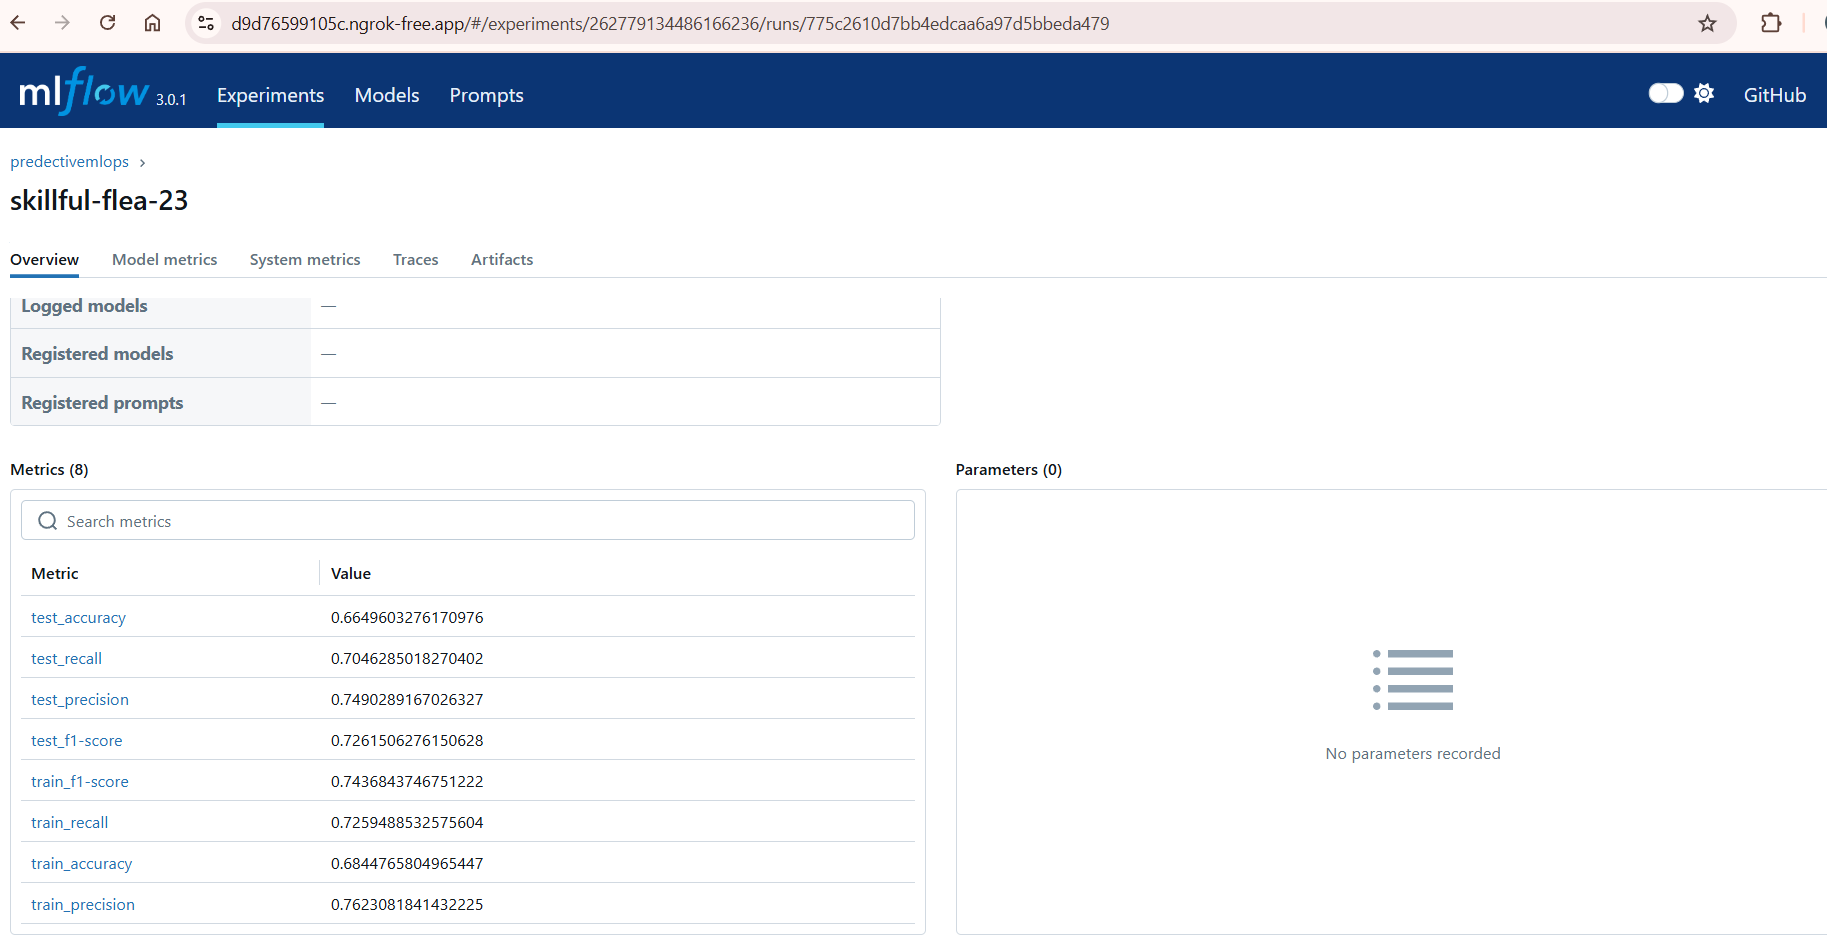

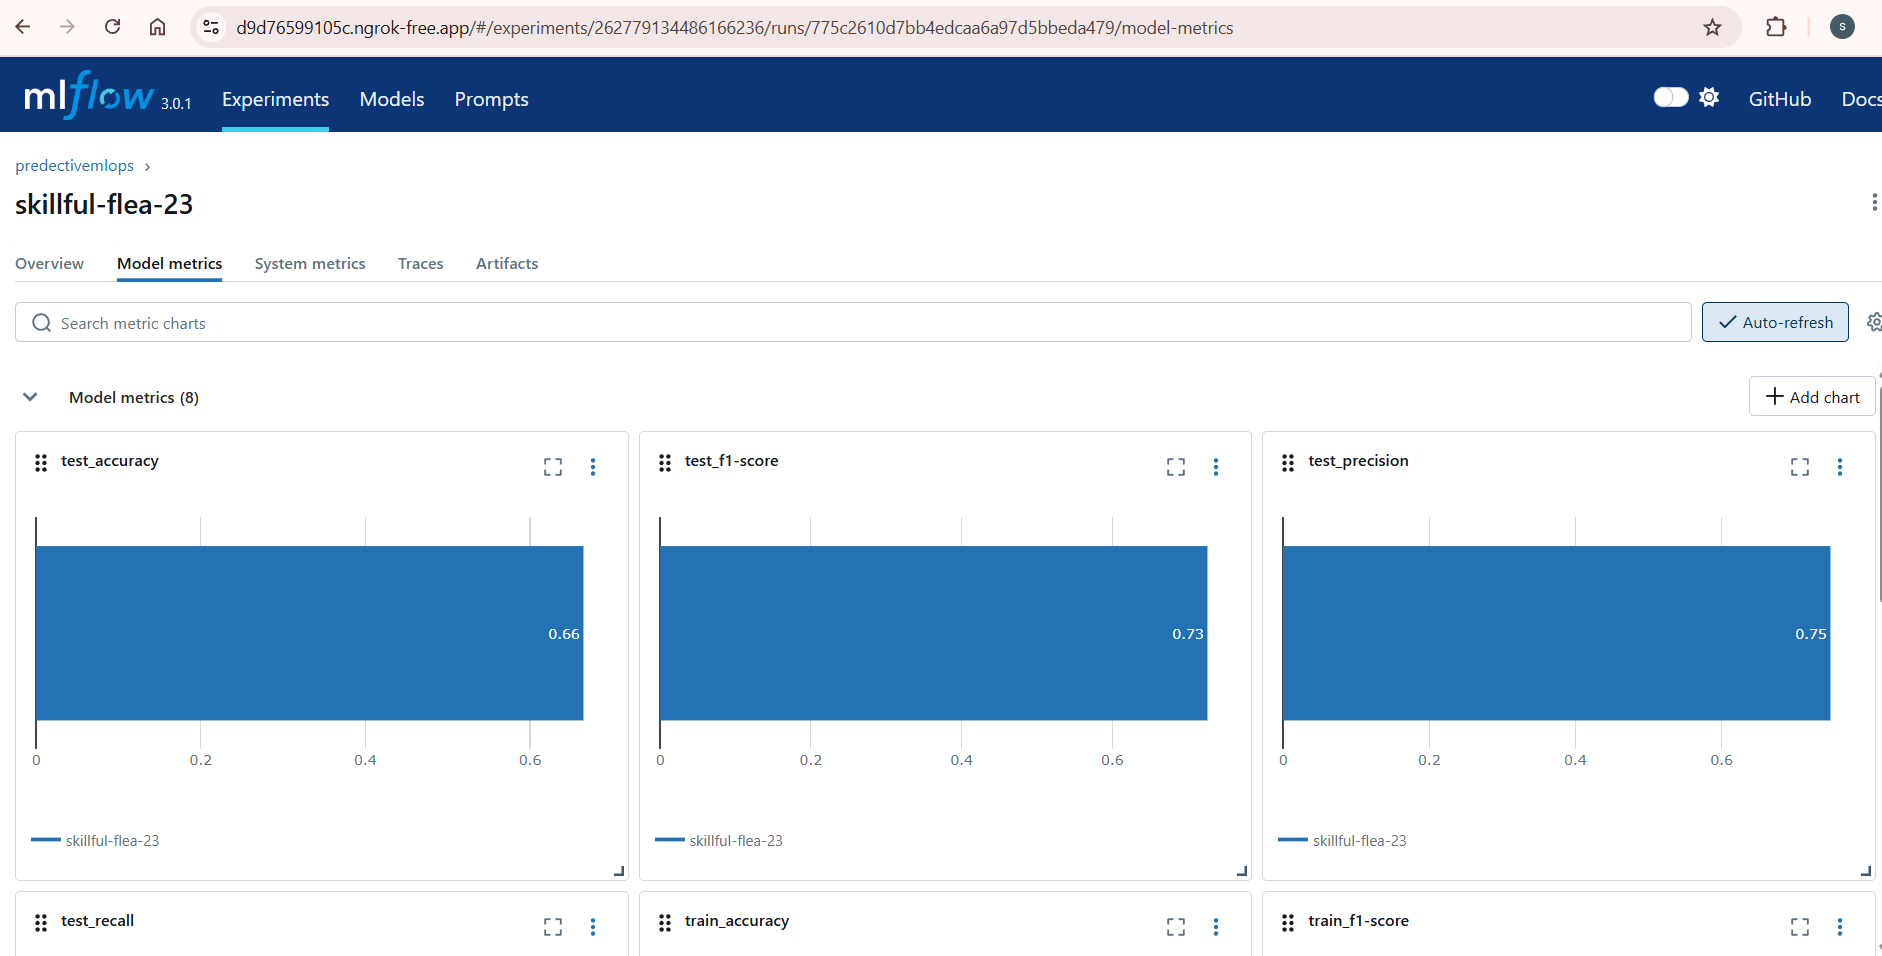

Experiment and Tracking in Production Environment

In [20]:
%%writefile predective_maintainance_project/model_building/train.py

# Data manipulation
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Model training, tuning, evaluation
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Model serialization and system
import joblib
import os

# Hugging Face API
from huggingface_hub import HfApi, create_repo
from huggingface_hub.utils import RepositoryNotFoundError

# MLflow
import mlflow

# ------------------------------
# Load HF token
try:
    from google.colab import userdata
    HF_TOKEN = userdata.get('HF_TOKEN')
except ModuleNotFoundError:
    HF_TOKEN = os.getenv("HF_TOKEN")

api = HfApi(token=HF_TOKEN)

# MLflow setup
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("predectivemlops")

# Dataset paths
Xtrain_path = "hf://datasets/sasipriyank/predectivemlops/Xtrain.csv"
Xtest_path  = "hf://datasets/sasipriyank/predectivemlops/Xtest.csv"
ytrain_path = "hf://datasets/sasipriyank/predectivemlops/ytrain.csv"
ytest_path  = "hf://datasets/sasipriyank/predectivemlops/ytest.csv"

# ------------------------------
# Load CSV with header and safe conversion
Xtrain = pd.read_csv(Xtrain_path, header=0)
Xtest  = pd.read_csv(Xtest_path, header=0)
ytrain = pd.read_csv(ytrain_path, header=0).iloc[:,0]
ytest  = pd.read_csv(ytest_path, header=0).iloc[:,0]

numeric_features = [
    'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
    'lub oil temp', 'Coolant temp', 'Engine rpm'
]

# Convert numeric columns safely
for col in numeric_features:
    Xtrain[col] = pd.to_numeric(Xtrain[col], errors='coerce')
    Xtest[col]  = pd.to_numeric(Xtest[col], errors='coerce')

# Drop rows with NaN (if conversion fails)
Xtrain.dropna(inplace=True)
Xtest.dropna(inplace=True)
ytrain = ytrain[Xtrain.index].astype(int)
ytest  = ytest[Xtest.index].astype(int)

print(" Data loaded and converted successfully")

# ------------------------------
# Handle class imbalance
class_weight = ytrain.value_counts()[0] / ytrain.value_counts()[1]

# Preprocessing
preprocessor = make_column_transformer((StandardScaler(), numeric_features))

# XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=class_weight, random_state=42)

# Hyperparameter grid
param_grid = {
    'xgbclassifier__n_estimators': [50, 75, 100],
    'xgbclassifier__max_depth': [2, 3, 4],
    'xgbclassifier__colsample_bytree': [0.4, 0.5],
    'xgbclassifier__colsample_bylevel': [0.4, 0.5],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
    'xgbclassifier__reg_lambda': [0.4, 0.5]
}

# Pipeline
model_pipeline = make_pipeline(preprocessor, xgb_model)

# ------------------------------
# Train & log with MLflow
with mlflow.start_run():
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(Xtrain, ytrain)

    best_model = grid_search.best_estimator_

    classification_threshold = 0.45

    # Predictions
    y_pred_train_proba = best_model.predict_proba(Xtrain)[:,1]
    y_pred_train = (y_pred_train_proba >= classification_threshold).astype(int)
    y_pred_test_proba = best_model.predict_proba(Xtest)[:,1]
    y_pred_test = (y_pred_test_proba >= classification_threshold).astype(int)

    # Reports
    train_report = classification_report(ytrain, y_pred_train, output_dict=True)
    test_report  = classification_report(ytest, y_pred_test, output_dict=True)

    # Log metrics
    mlflow.log_metrics({
        "train_accuracy": train_report['accuracy'],
        "train_precision": train_report['1']['precision'],
        "train_recall": train_report['1']['recall'],
        "train_f1-score": train_report['1']['f1-score'],
        "test_accuracy": test_report['accuracy'],
        "test_precision": test_report['1']['precision'],
        "test_recall": test_report['1']['recall'],
        "test_f1-score": test_report['1']['f1-score']
    })

    # Save locally
    model_path = "best_predective_model.joblib"
    joblib.dump(best_model, model_path)
    mlflow.log_artifact(model_path, artifact_path="model")
    print(f" Model saved at {model_path}")

# ------------------------------
# Upload to Hugging Face
repo_id = "sasipriyank/predectivemodel"
repo_type = "model"
try:
    api.repo_info(repo_id=repo_id, repo_type=repo_type)
    print(f"Space '{repo_id}' already exists.")
except RepositoryNotFoundError:
    create_repo(repo_id=repo_id, repo_type=repo_type, private=False)
    print(f"Space '{repo_id}' created.")

api.upload_file(
    path_or_fileobj=model_path,
    path_in_repo=model_path,
    repo_id=repo_id,
    repo_type=repo_type
)
print(" Model uploaded to Hugging Face successfully")

Writing predective_maintainance_project/model_building/train.py
